# **Importing needed libaries**

In [84]:
import qiskit as qs
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit,transpile,assemble
from qiskit_aer import AerSimulator
import random

# **Making Deutsch's Algorithm**

In [90]:
def Quantum_Circuit():
    # calling a random function to determine f(x) is constant or balance.
    function_type = random.randint(0, 1)
    # making a circuit with two starting qbits(one input registery) and one output (one output registry)
    circuit = QuantumCircuit(2, 1)
    #making |1> then turning it into |-> & putting the qbit into superposition
    circuit.x(0)
    circuit.h(0)
    #putting a barrier so , the visualization is more organized
    circuit.barrier()
    #putting qbit into superposition
    circuit.h(1)
    #putting a barrier so , the visualization is more organized
    circuit.barrier()
    #so if function is constant 
    if function_type == 0:
        # making a random constant f(x)
        secret_function = random.randint(0, 1) 
        # if f(0) = 0 , f(1) = 0
        #the xor of function and y is y.
        #|y xor f(x)>
        #so we will do nothing
        if secret_function == 0:
            pass
        # if f(0) = 1 , f(1) = 1
        # we will put the identity gate on y
        else: 
           circuit.x(0)
    #if function is balanced, we put a CNOT(controlled NOT) on the qubits,q1 is controlling the q0 
    #if q1 is |1> then q0 is flipped 
    else:
        circuit.cx(1, 0)
    #putting a barrier so , the visualization is more organized
    circuit.barrier()
    #now turning q0 from |-> to |1>&|0> by hadamard
    circuit.h(1)
    #measuring the q1
    circuit.measure(1, 0)
    return circuit

# **Making some circuits and runing and measuning them**

In [60]:
q_circuit_01 = Quantum_Circuit()

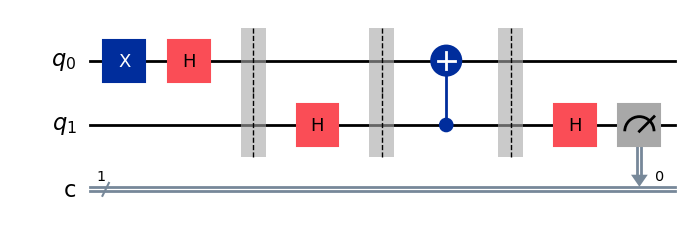

In [62]:
q_circuit_01.draw('mpl')

In [64]:
q_circuit_01.draw()

┌───┐┌───┐ ░       ░ ┌───┐ ░         
q_0: ┤ X ├┤ H ├─░───────░─┤ X ├─░─────────
     └───┘└───┘ ░ ┌───┐ ░ └─┬─┘ ░ ┌───┐┌─┐
q_1: ───────────░─┤ H ├─░───■───░─┤ H ├┤M├
                ░ └───┘ ░       ░ └───┘└╥┘
c: 1/═══════════════════════════════════╩═
                                        0

In [66]:
q_circuit_02 = Quantum_Circuit()

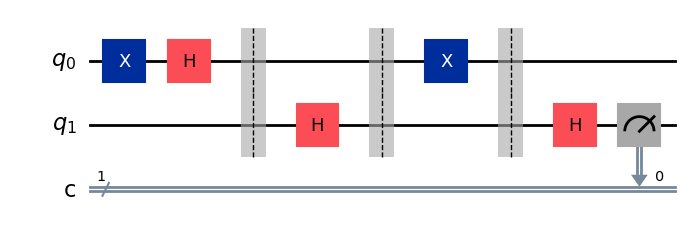

In [72]:
q_circuit_02.draw('mpl')

In [74]:
q_circuit_02.draw()

┌───┐┌───┐ ░       ░ ┌───┐ ░         
q_0: ┤ X ├┤ H ├─░───────░─┤ X ├─░─────────
     └───┘└───┘ ░ ┌───┐ ░ └───┘ ░ ┌───┐┌─┐
q_1: ───────────░─┤ H ├─░───────░─┤ H ├┤M├
                ░ └───┘ ░       ░ └───┘└╥┘
c: 1/═══════════════════════════════════╩═
                                        0

# **if there is any parity among starting qbit and function the result will be one, otherwise zero.**

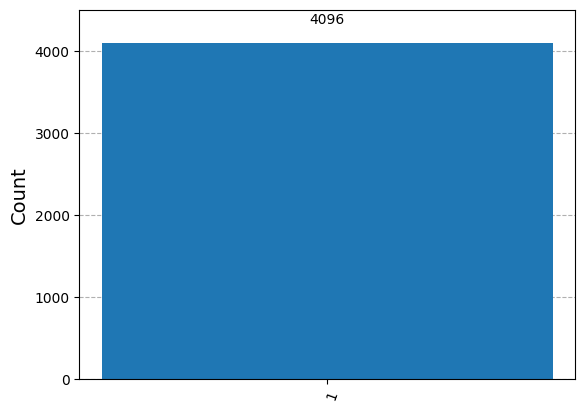

In [76]:
backend = AerSimulator()
transpiled_circuit = transpile(q_circuit_01, backend)
qjob = backend.run(transpiled_circuit, shots=4096)
result = qjob.result()
counts = result.get_counts()
plot_histogram(counts)

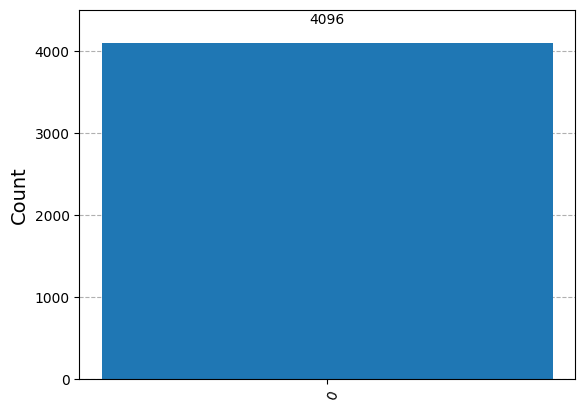

In [78]:
backend = AerSimulator()
transpiled_circuit = transpile(q_circuit_02, backend)
qjob = backend.run(transpiled_circuit, shots=4096)
result = qjob.result()
counts = result.get_counts()
plot_histogram(counts)